In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [27]:
data = pd.read_csv ("IMDb Movies India.csv",encoding='latin1' ) 
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [8]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [16]:
data = data.drop(columns = ['Actor 2','Actor 3'])
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave
...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar


In [15]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data['Year'].unique()


In [ ]:
def handleYear(value):
    value = str(value).strip('()')
    return int(value)
data['Year'] = data['Year'].apply(handleYear)
data['Year'].head()



In [ ]:
def handleDuration(value):
    value=str(value).split(' ')
    value=value[0]
    return int(value)
data['Duration']=data['Duration'].apply(handleDuration)
data['Duration'].head()


In [17]:

def split_genre_column(MovieData,Genre):
   
    data['Genre1'] = data[Genre].str.split(',', expand=True)[0]
    data['Genre2'] = data[Genre].str.split(',', expand=True)[1]
    data['Genre3'] = data[Genre].str.split(',', expand=True)[2]
    return data

split_genre_column(data,'Genre')


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Genre1,Genre2,Genre3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Drama,None,None
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Comedy,Romance,None
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Comedy,Drama,Musical
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Drama,Romance,War
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Horror,Mystery,Thriller
...,...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Drama,None,None
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Biography,Drama,History
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Action,Crime,Drama
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Action,Drama,None


In [18]:
data.isna().sum()


Name           0
Year           0
Duration       0
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Genre1         0
Genre2      1658
Genre3      3340
dtype: int64

In [19]:

data = data.fillna(0)
data.isna().sum()


Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Genre1      0
Genre2      0
Genre3      0
dtype: int64

In [20]:

G=['Genre1','Genre2','Genre3']
for x in G:
    data[x],_ = pd.factorize(data[x])
    
data = data.drop(columns=['Genre'])
data.head(3)


,Name,Year,Duration,Rating,Votes,Director,Actor 1,Genre1,Genre2,Genre3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,7.0,8,Gaurav Bakshi,Rasika Dugal,0,0,0
3,#Yaaram,(2019),110 min,4.4,35,Ovais Khan,Prateik,1,1,0
5,...Aur Pyaar Ho Gaya,(1997),147 min,4.7,827,Rahul Rawail,Bobby Deol,1,2,1


In [21]:

def handleVotes(value):
    value = str(value).replace(',','')
    return int(value)
data['Votes'] = data['Votes'].apply(handleVotes)
data['Votes'].head()


1       8
3      35
5     827
6    1086
8     326
Name: Votes, dtype: int64

In [ ]:
data['MovieAge'] = 2024 - data['Year']
data['MovieAge'] 

In [22]:
DirectorCounts =data['Director'].value_counts()
data['DirectorPopularity']= data['Director'].map(DirectorCounts)
ActorCounts= data['Actor 1'].value_counts() 
data['ActorPopularity']=data['Actor 1'].map(ActorCounts) 

In [24]:
DirectorAvgRating = data.groupby('Director')['Rating'].mean()
data['DirectorAvgRating'] = data['Director'].map(DirectorAvgRating)

ActorAvgRating = data[['Actor 1']].stack().reset_index(name='Actor')
ActorAvgRating = ActorAvgRating.merge(data[['Rating']], left_on='level_0', right_index=True)
ActorAvgRating = ActorAvgRating.groupby('Actor')['Rating'].mean()
data['ActorAvgRating'] = data['Actor 1'].map(ActorAvgRating) 

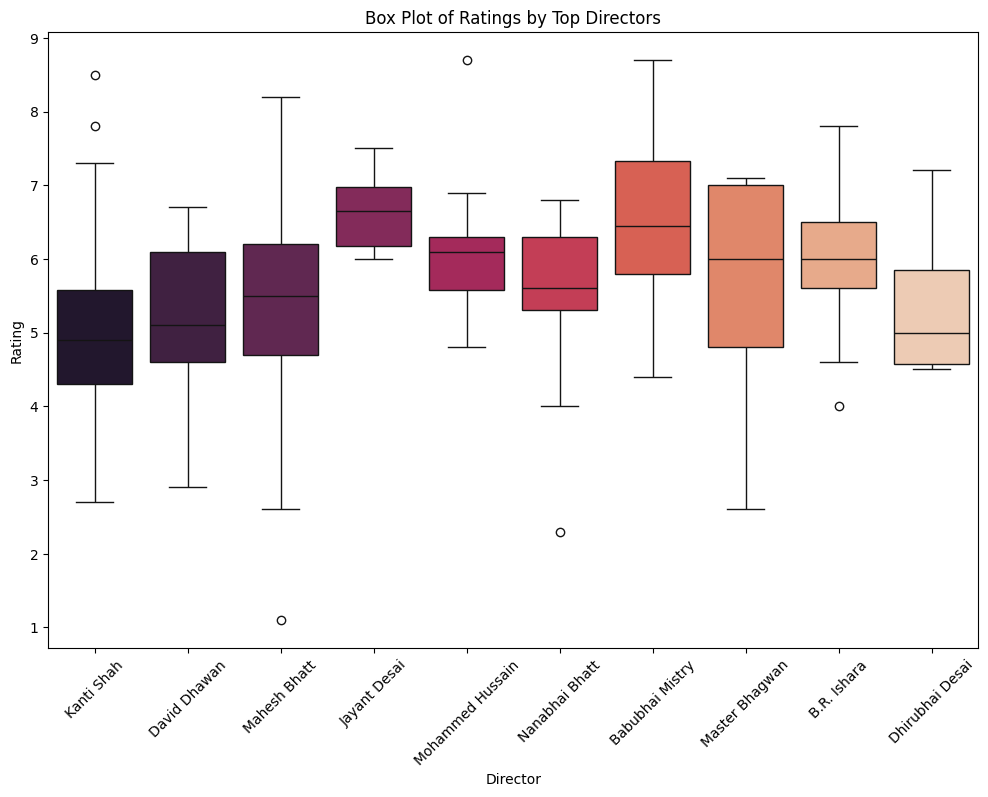

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns



# Setting the figure size
plt.figure(figsize=(12, 8))

# Getting the top 10 directors by number of movies
TopDirectors = data['Director'].value_counts().index[0:10]

# Creating a box plot for ratings of top 10 directors
sns.boxplot(
    data=data[data['Director'].isin(TopDirectors)], 
    x='Director', 
    y='Rating', 
    palette='rocket'
)

# Adding title and labels
plt.title('Box Plot of Ratings by Top Directors')
plt.xlabel('Director')
plt.ylabel('Rating')

# Rotating x-ticks for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()



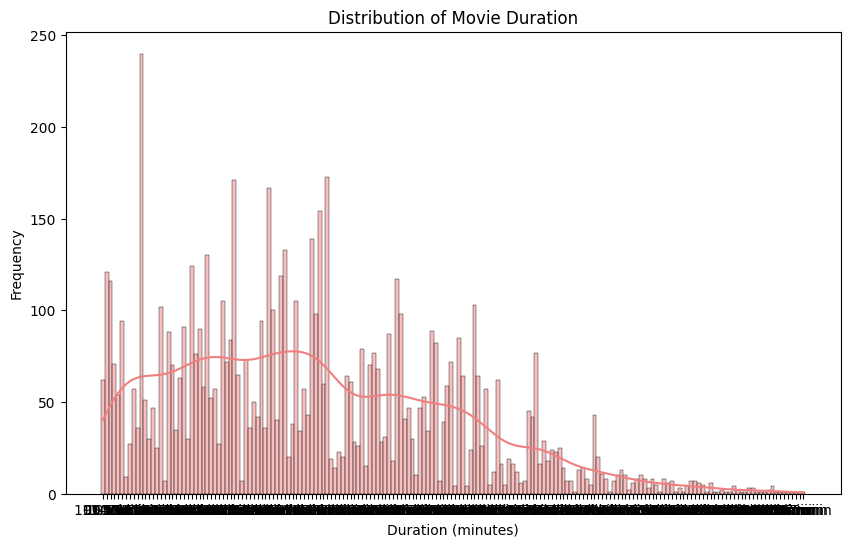

In [35]:
plt.figure(figsize=(10,6))
sns.histplot(data['Duration'],bins=20,kde=True,color='lightcoral')

plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


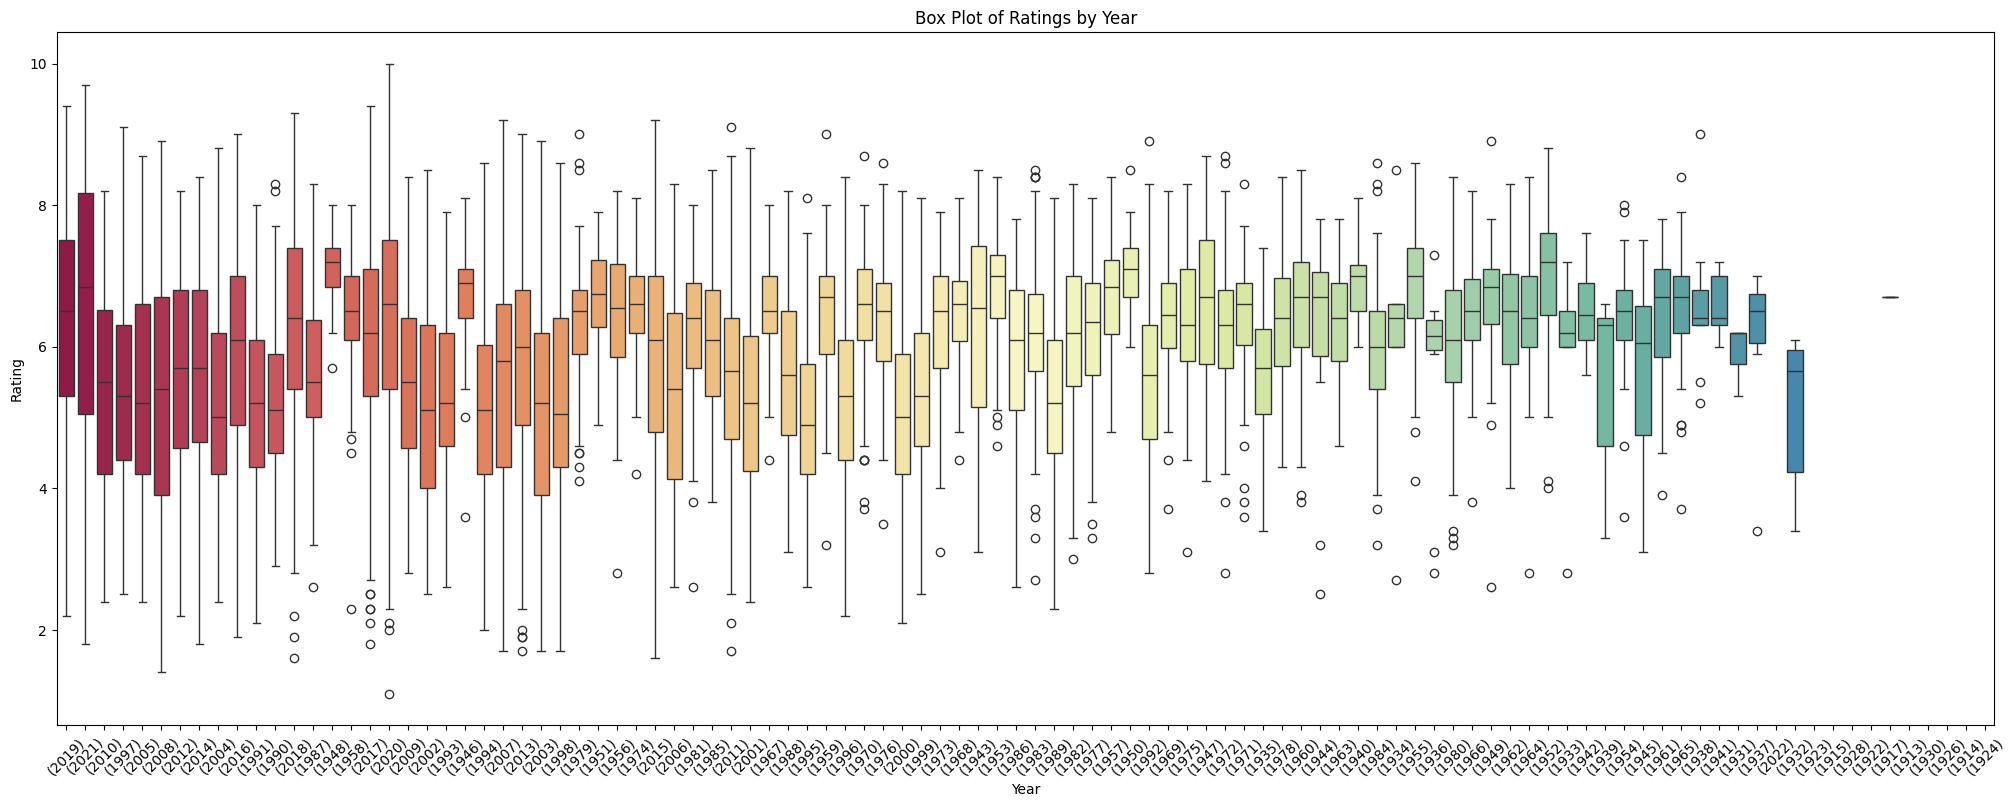

In [39]:
plt.figure(figsize=(25,9))
sns.boxplot(data=data,x='Year',y='Rating',palette='Spectral')
sns.dark_palette("#69d",reverse=True,as_cmap=True)
plt.title('Box Plot of Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()
